<a href="https://colab.research.google.com/github/ibrahimmansur4/K-Nearest-Neighbour-KNN-algorithm/blob/main/KKN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment No.1:k-nearest neighbors


Before running this block, make sure to upload "data.mat" in the google drive.

In [2]:
#Enter your path of dataset from google drive
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/MyDrive/KNN_Assignment/"

dataset = path + "data.mat"

#Enter path of your test image
test_image=path+"test.jpg"
mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']
images.shape

Mounted at /content/drive/


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read.

In [3]:
import numpy as np
images= np.transpose(images)
images.shape
im = np.reshape(images, [ 32, 32, 3, -1], order="F")

(32, 32, 3)


(32, 32, 3)

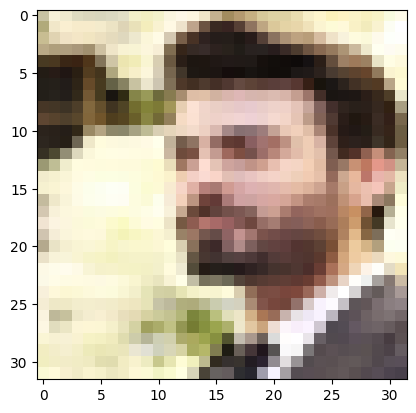

In [4]:
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

plt.imshow(im[:,:,:,40])
print(im[:,:,:,0].shape)
a= im[:,:,:,40]
plt.imshow(a)
a.shape

You Need to write your code in this block.

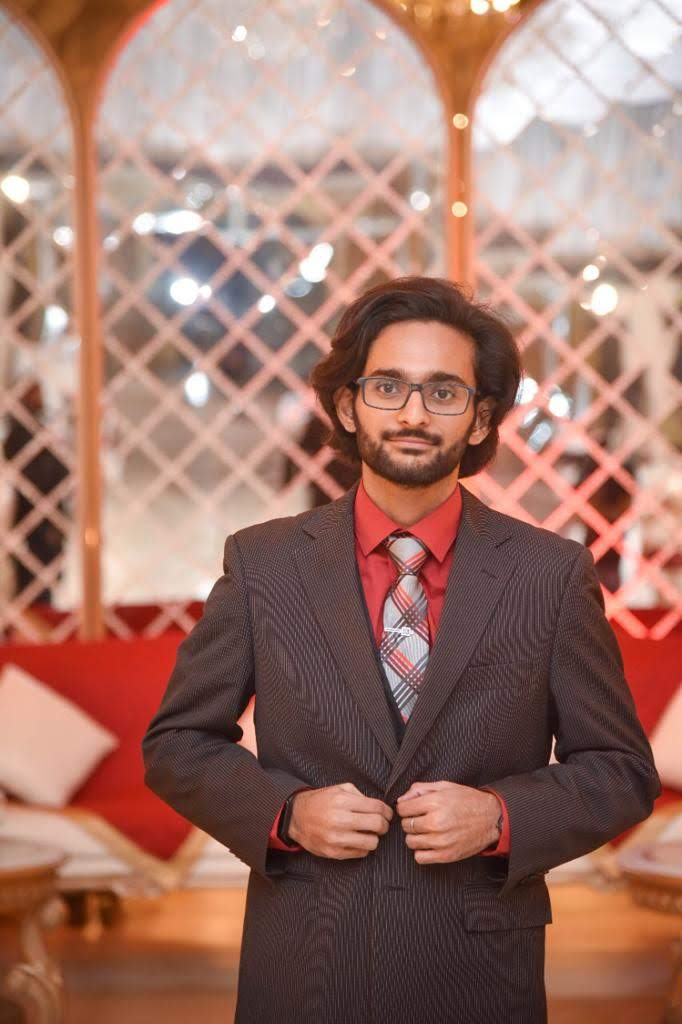

Original Image  (1024, 682, 3)


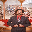

Resized Image (32, 32, 3)
simple reshaped (1, 3072)
transpose (3, 32, 32)
reshaped (32, 32, 3, 1)
+-------------+--------------------+
| Image Index |      Distance      |
+-------------+--------------------+
|      0      | 30939.182115886644 |
|      1      | 31708.004509902545 |
|      2      | 31399.81984024749  |
|      3      | 31713.324959707395 |
|      4      | 31164.065973489403 |
|      5      |  31744.6748290166  |
|      6      | 31597.73783042071  |
|      7      | 31798.57955947089  |
|      8      | 31459.24611302693  |
|      9      | 31479.693518203127 |
|      10     | 31619.786558419397 |
|      11     | 31364.067784648087 |
|      12     | 31575.280362967485 |
|      13     | 31202.078841000322 |
|      14     | 31349.791099782466 |
|      15     | 31579.94575676152  |
|      16     | 31629.675907286815 |
|      17     | 31541.550342365863 |
|      18     |  31440.098027837   |
|      19     | 31473.22582767772  |
|      20     | 31484.777401150543 |
|      21     

In [5]:
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray
from prettytable import PrettyTable

# Initialize an array to store distances
distances = []

for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F")

    #Read your image here
    test_img = cv2.imread(test_image)

    #Resize your image
    resized_img = cv2.resize(test_img, (32, 32))

    #Reshape your image as we reshape the image of dataset
    reshaped_img = resized_img.reshape(1, -1)
    transposed_img = np.transpose(resized_img)
    reshaped_img_ = np.reshape(transposed_img, [ 32, 32, 3, -1], order="F")

    #Calculate Eucleadian distance between your image and dataset
    distance = np.sqrt(np.sum((reshaped_img_ - G) ** 2))
    distances.append(distance)

cv2_imshow(test_img)
print("Original Image " , test_img.shape)
cv2_imshow(resized_img)
print("Resized Image" , resized_img.shape)
print("simple reshaped" ,reshaped_img.shape)
print("transpose" , transposed_img.shape)
print("reshaped" , reshaped_img_.shape)
# Create a table for the distances
table = PrettyTable()
table.field_names = ["Image Index", "Distance"]
for i, distance in enumerate(distances):
    table.add_row([i, distance])
print(table)



In this Block you need to fill the code for 1-NN.

30939.182115886644
0


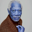

(32, 32, 3)

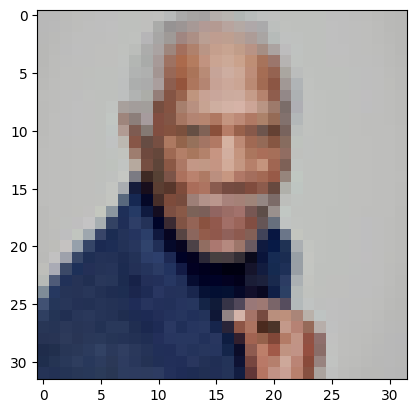

In [6]:
# Write code for 1 NN
#Find min distance
min_distance = min(distances)
min_distance_index = np.argmin(distance)
#Find at which point min value exists
print(min_distance)
print(min_distance_index)

cv2_imshow(im[:, :, :, min_distance_index])

plt.imshow(im[:,:,:,min_distance_index])
a = im[:,:,:,min_distance_index]
plt.imshow(a)
a.shape



Write code for 3 NN


30939.182115886644
31134.759835270932
31164.065973489403


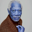

Image index: 0, Shape: (32, 32, 3)


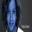

Image index: 34, Shape: (32, 32, 3)


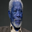

Image index: 4, Shape: (32, 32, 3)


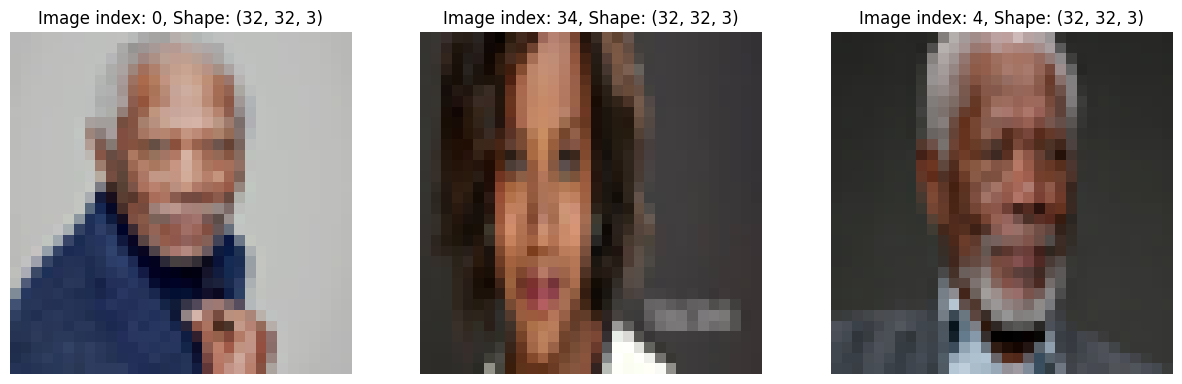

In [7]:
#3 NN
#Write code for 3 NN
#Find 3 min distances
#Find their instances
# Find the indices of the three nearest neighbors
k = 3
min_distance = sorted(distances)
for i in range(3):
  print(min_distance[i])
min_distance_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:k]
# Display the three images from the dataset that best match your test image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, index in enumerate(min_distance_indices):
    cv2_imshow(im[:, :, :, index])
    a = im[:, :, :, index]
    print(f"Image index: {index}, Shape: {a.shape}")
    axs[i].imshow(im[:, :, :, index])
    axs[i].set_title(f"Image index: {index}, Shape: {im[:, :, :, index].shape}")
    axs[i].axis('off')
plt.show()



Write code for 5 NN

30939.182115886644
31134.759835270932
31164.065973489403
31202.078841000322
31339.998978940635


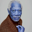

Image index: 0, Shape: (32, 32, 3)


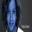

Image index: 34, Shape: (32, 32, 3)


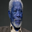

Image index: 4, Shape: (32, 32, 3)


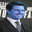

Image index: 13, Shape: (32, 32, 3)


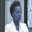

Image index: 33, Shape: (32, 32, 3)


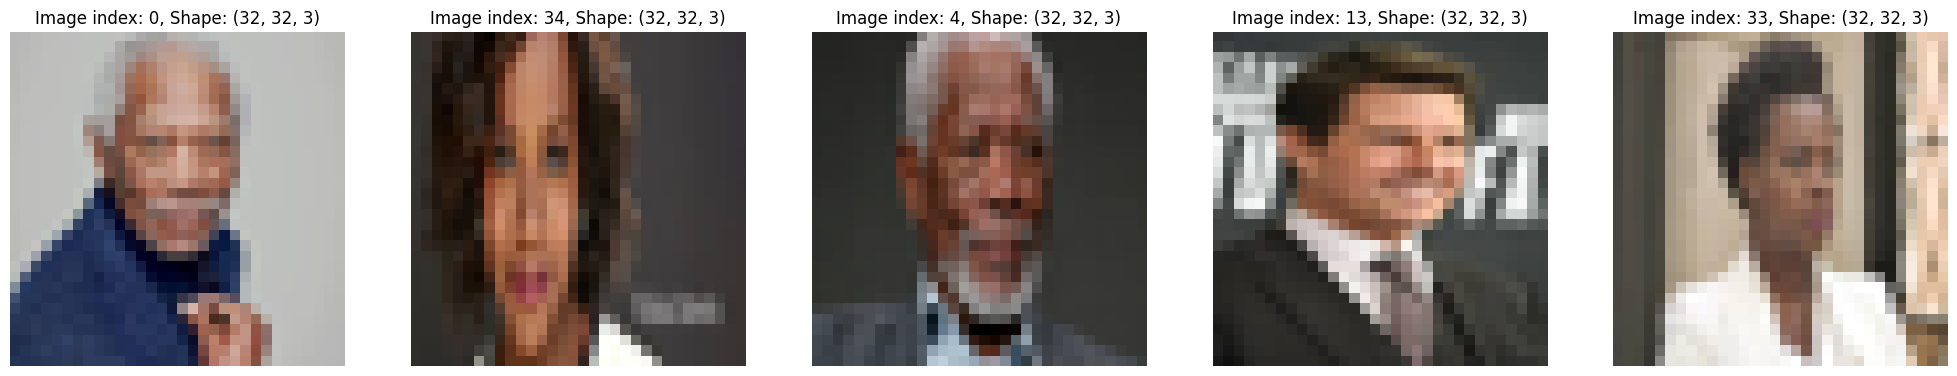

In [8]:
#Write code for 5 NN
#Find 5 min distances
#Find their instances
# Find the indices of the 5 nearest neighbors
k = 5
min_distance = sorted(distances)
for i in range(k):
  print(min_distance[i])


min_distance_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:k]

# Display the 5 images from the dataset that best match your test image
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for i, index in enumerate(min_distance_indices):
    cv2_imshow(im[:, :, :, index])
    a = im[:, :, :, index]
    print(f"Image index: {index}, Shape: {a.shape}")
    axs[i].imshow(im[:, :, :, index])
    axs[i].set_title(f"Image index: {index}, Shape: {im[:, :, :, index].shape}")
    axs[i].axis('off')
plt.show()

# Report

## Introduction

The objective of this project was to implement the K-Nearest Neighbors (KNN) algorithm to determine the actor or actress that closely resembles my image. KNN is a widely used algorithm for classification and regression tasks in machine learning. By computing the Euclidean distance between my image and the dataset images, we aimed to identify the most similar images.

## Pseudo Code

The KNN algorithm involves the following key steps:
1. Load the dataset containing 32x32 color images of actors, along with their corresponding labels.
2. Read and preprocess the test image to match the dimensions and format of the dataset images.
3. Compute the Euclidean distance between the test image and each image in the dataset.
4. Implement the KNN approach to identify the closest images based on the calculated distances.

## Explanation of Code/Syntax

The provided code utilizes various Python libraries, including:

- **NumPy**: Used for array manipulation and mathematical operations. The following code snippet calculates the Euclidean distance between the reshaped image and the dataset image:

    ```python
    distance = np.sqrt(np.sum((reshaped_img_ - G) ** 2))
    ```

- **OpenCV**: Employed for reading, resizing, and displaying images. The code below demonstrates the reading and resizing of the test image:

    ```python
    test_img = cv2.imread(test_image)
    resized_img = cv2.resize(test_img, (32, 32))
    ```

- **Matplotlib**: Utilized for visualizing images and displaying plots. The code segment presented showcases the visualization of the dataset images:

    ```python
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i, index in enumerate(min_distance_indices):
        axs[i].imshow(im[:, :, :, index])
        axs[i].set_title(f"Image index: {index}, Shape: {im[:, :, :, index].shape}")
        axs[i].axis('off')
    plt.show()
    ```

The implementation also includes a loop to calculate distances and determine the nearest images. Additionally, functions are utilized for displaying images and printing relevant information.


## Results and Analysis

Upon executing the KNN algorithm, I observed the display of images closely resembling my image, along with their corresponding indices and shapes. Notably, the images that closely matched my test image predominantly featured black actors and one image of Tom Cruise wearing a suit. This finding could be attributed to the color of my skin, which is brown, and the attire I was wearing in the test image, a black suit.

During the implementation, I encountered certain limitations, such as the need for manual adjustments and potential issues with larger datasets. The algorithm's reliance on the Euclidean distance metric might have contributed to the bias towards images with similar color tones and clothing, rather than focusing on facial features or other distinguishing characteristics. To enhance the performance of the algorithm, I recommend optimizing the code for improved efficiency, exploring alternative distance metrics that account for color variations and facial features, and refining the preprocessing steps to extract more accurate and relevant features from the images.

By addressing these limitations and implementing the suggested enhancements, the KNN algorithm can be further fine-tuned to ensure more accurate and unbiased image classification, particularly when dealing with diverse datasets and varying image attributes.


## Conclusion

In conclusion, the KNN algorithm demonstrated its effectiveness in identifying similar images based on computed distances. Despite its simplicity, the algorithm serves as a valuable tool for image classification tasks. By addressing the identified limitations and optimizing the code, we can further improve the accuracy and efficiency of the KNN model, making it more reliable for real-world applications in image recognition and classification.












---


